---
title: "PM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
import openmatrix as omx
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# User Inptus

In [3]:
# scenario paths
scenarioOnePath = r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2'          # EMME OpenPaths
scenarioTwoPath = r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2'     # EMME 4.3.7

# desired matrix
matrix = 'transit_skims_PM.omx'

# desired sub matrices
sub_matrices = [
    'WALK_PRM_TOTALIVTT__PM'
    ,'WALK_PRM_LRTIVTT__PM'
    ,'WALK_PRM_CMRIVTT__PM'
    ,'WALK_PRM_EXPIVTT__PM'
    ,'WALK_PRM_LTDEXPIVTT__PM'
    ,'WALK_PRM_BRTIVTT__PM'
    ]

In [4]:
# create paths to read
skimFileOne = os.path.join(scenarioOnePath, 'output', 'skims', matrix) # EMME OpenPaths
skimFileTwo = os.path.join(scenarioTwoPath, 'output', 'skims', matrix) # EMME 4.3.7
print('EMME OpenPath: ' + skimFileOne)
print('EMME 4.3.7: ' + skimFileTwo)

EMME OpenPath: T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2\output\skims\transit_skims_PM.omx
EMME 4.3.7: T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2\output\skims\transit_skims_PM.omx


In [5]:
# compare function
def skimReader(inSkim):

    # read skim
    skims = omx.open_file(inSkim)
    zones = list(skims.mapping('zone_number').keys())

    # empty df with all zone-to-zone combinations
    zoneToZone = pd.DataFrame(list(itertools.product(list(range(1,4947+1,1)), repeat=2)))
    zoneToZone.columns = ['Origin', 'Destination']

    # read sub-matrices, convert from wide to long, and merge
    for sub_matrix in sub_matrices:
        od = pd.DataFrame(
            np.array(skims[sub_matrix]),
            zones,
            zones,
            )
        od = od.stack().reset_index().set_axis('Origin Destination {}'.format(sub_matrix).split(), axis=1)
        zoneToZone = zoneToZone.merge(od, on=['Origin', 'Destination'])
    
    return(zoneToZone)

In [6]:
# generate comparison
scenarioOne = skimReader(skimFileOne)
scenarioTwo = skimReader(skimFileTwo)

# OpenPaths minus EMME4.3.7 (exclude Origin and Destination columns)
comparison = scenarioOne.set_index(['Origin', 'Destination']) - scenarioTwo.set_index(['Origin','Destination'])
comparison.reset_index(inplace=True)

# Scatterplot Comparison of PM Peak for WALK PRM modes assignment

Scatterplot comparison of PM Peak total actual in-vehicle travel time by walk premium

Intercept: 0.0008
Slope: 1.0038
R² Score: 0.9988
RMSE: 0.9207


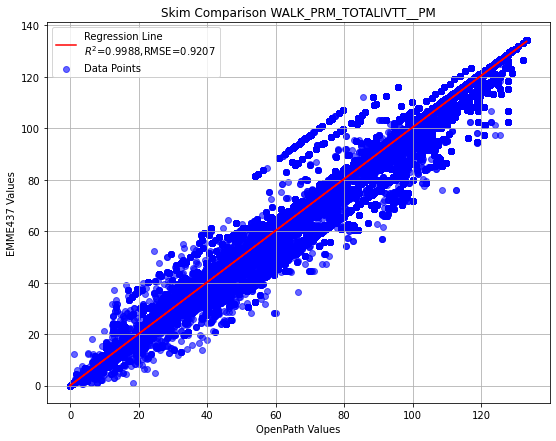

In [7]:
OpenPath_values = scenarioOne['WALK_PRM_TOTALIVTT__PM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_TOTALIVTT__PM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_TOTALIVTT__PM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of PM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0081
Slope: 1.0023
R² Score: 0.9975
RMSE: 0.6135


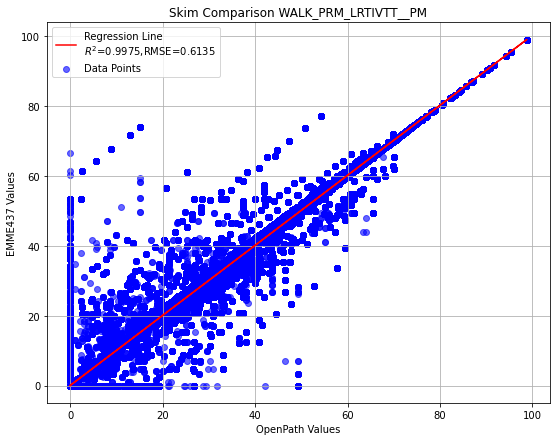

In [8]:
OpenPath_values = scenarioOne['WALK_PRM_LRTIVTT__PM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_LRTIVTT__PM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_LRTIVTT__PM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of PM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: 0.0152
Slope: 1.0038
R² Score: 0.9895
RMSE: 0.8673


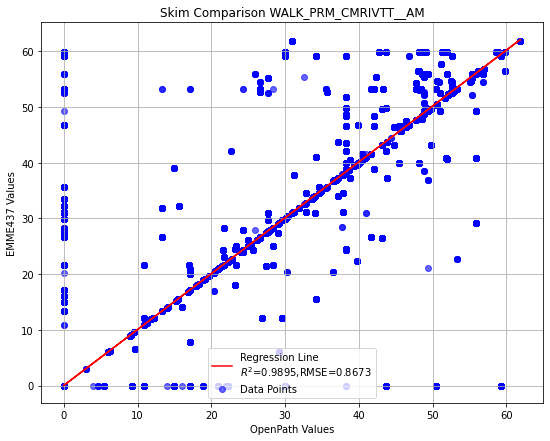

In [9]:
OpenPath_values = scenarioOne['WALK_PRM_CMRIVTT__PM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_CMRIVTT__PM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_CMRIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of PM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0008
Slope: 1.0144
R² Score: 0.9896
RMSE: 0.6803


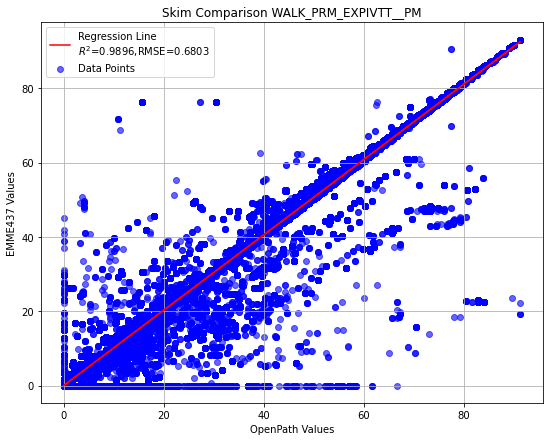

In [10]:
OpenPath_values = scenarioOne['WALK_PRM_EXPIVTT__PM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_EXPIVTT__PM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_EXPIVTT__PM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of PM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0017
Slope: 0.9969
R² Score: 0.9920
RMSE: 1.3282


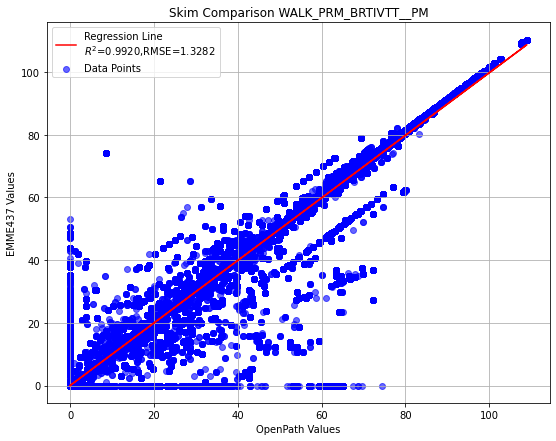

In [11]:
OpenPath_values = scenarioOne['WALK_PRM_BRTIVTT__PM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_BRTIVTT__PM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_BRTIVTT__PM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Summary of transit PM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__PM)

In [12]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__PM', ascending=False).head()

,Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_LTDEXPIVTT__PM,WALK_PRM_BRTIVTT__PM
249540,51,2191,36.660439,42.12169,-52.626923,8.855270,0.0,38.310394
249575,51,2226,36.660439,42.12169,-52.626923,8.855270,0.0,38.310394
9075646,1835,2849,34.176659,0.00000,0.000000,71.988834,0.0,-37.812176
9075693,1835,2896,34.176659,0.00000,0.000000,71.988834,0.0,-37.812176
9075890,1835,3093,34.176659,0.00000,0.000000,71.988834,0.0,-37.812176


Below is the summary of select matrices difference in transit PM skim

In [13]:
comparison.WALK_PRM_TOTALIVTT__PM.describe()

count    2.447281e+07
mean    -4.720142e-02
std      9.261870e-01
min     -2.769609e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.666044e+01
Name: WALK_PRM_TOTALIVTT__PM, dtype: float64

In [14]:
comparison.WALK_PRM_LRTIVTT__PM.describe()

count    2.447281e+07
mean    -1.906455e-02
std      6.141167e-01
min     -6.644537e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.924223e+01
Name: WALK_PRM_LRTIVTT__PM, dtype: float64

In [15]:
comparison.WALK_PRM_CMRIVTT__PM.describe()

count    2.447281e+07
mean    -2.138625e-02
std      8.678504e-01
min     -5.987768e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.921622e+01
Name: WALK_PRM_CMRIVTT__PM, dtype: float64

In [16]:
comparison.WALK_PRM_EXPIVTT__PM.describe()

count    2.447281e+07
mean    -1.935042e-02
std      6.867709e-01
min     -6.093031e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.198883e+01
Name: WALK_PRM_EXPIVTT__PM, dtype: float64

In [17]:
comparison.WALK_PRM_LTDEXPIVTT__PM.describe()

count    24472809.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0
Name: WALK_PRM_LTDEXPIVTT__PM, dtype: float64

In [18]:
comparison.WALK_PRM_BRTIVTT__PM.describe()

count    2.447281e+07
mean     1.259984e-02
std      1.329021e+00
min     -6.562264e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.445815e+01
Name: WALK_PRM_BRTIVTT__PM, dtype: float64

Let's check the records with difference in WALK_PRM_LRTIVTT__PM greater than 45

In [26]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']>45]

,Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_LTDEXPIVTT__PM,WALK_PRM_BRTIVTT__PM
245166,50,2764,11.607300,49.242229,-52.626923,-38.887947,0.0,53.879940
249828,51,2479,23.040176,49.242229,-59.216217,0.000000,0.0,33.014162
344104,70,2762,14.906464,49.242229,-49.327763,-38.887947,0.0,53.879940
11823386,2391,57,24.189674,49.242229,-53.288387,-26.308313,0.0,54.544151
11843170,2395,53,17.792824,45.959414,-55.885838,0.000000,0.0,27.719250
12713842,2571,53,25.131012,49.242229,-59.877682,0.000000,0.0,35.766468
12862252,2601,53,25.131012,49.242229,-59.877682,0.000000,0.0,35.766468
12936457,2616,53,25.131012,49.242229,-59.877682,0.000000,0.0,35.766468
13040344,2637,53,25.131012,49.242229,-59.877682,0.000000,0.0,35.766468
13055185,2640,53,25.131012,49.242229,-59.877682,0.000000,0.0,35.766468


Let's check the records with difference in WALK_PRM_LRTIVTT__PM less than -50

In [20]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']<-50]

,Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_LTDEXPIVTT__PM,WALK_PRM_BRTIVTT__PM
91284,19,2239,8.834389,-53.380180,59.216217,27.523053,0.0,-24.524701
91290,19,2245,8.831398,-53.380180,59.216217,27.154952,0.0,-24.159592
91365,19,2320,8.839058,-53.380180,59.216217,27.527721,0.0,-24.524701
96231,20,2239,8.834389,-53.380180,59.216217,27.523053,0.0,-24.524701
96237,20,2245,8.831398,-53.380180,59.216217,27.154952,0.0,-24.159592
...,...,...,...,...,...,...,...,...
15831519,3201,1120,-22.283142,-51.091007,-33.585876,0.000000,0.0,62.393745
15880989,3211,1120,-22.283142,-51.091007,-33.585876,0.000000,0.0,62.393745
15895830,3214,1120,-22.283142,-51.091007,-33.585876,0.000000,0.0,62.393745
15979929,3231,1120,-15.078003,-51.091007,-33.585876,0.000000,0.0,69.598877


In [25]:
# choose sub-matrix
sub_matrix_number = 0 # see below for specific sub_marix number
n_largest = 25

sub_matrix = [
    'WALK_PRM_TOTALIVTT__PM'     # 0
    ,'WALK_PRM_BRTIVTT__PM'      # 1
    ,'WALK_PRM_CMRIVTT__PM'      # 2
    ,'WALK_PRM_EXPIVTT__PM'      # 3
    ,'WALK_PRM_LRTIVTT__PM'      # 4
    ,'WALK_PRM_LTDEXPIVTT__PM'   # 5
]

# choose N largest
print('Choosing top ' + str(n_largest) + ' of ' + str(sub_matrix[sub_matrix_number]))
comparison.nsmallest(n_largest, sub_matrix[0])[['Origin', 'Destination', sub_matrix[sub_matrix_number]]].sort_values(by=sub_matrix[sub_matrix_number], ascending=False)

Choosing top 25 of WALK_PRM_TOTALIVTT__PM


,Origin,Destination,WALK_PRM_TOTALIVTT__PM
5459778,1104,3238,-27.446434
5459782,1104,3242,-27.446434
5598298,1132,3242,-27.446434
5598294,1132,3238,-27.446434
5598196,1132,3140,-27.446434
5459873,1104,3333,-27.446434
5459863,1104,3323,-27.446434
5459857,1104,3317,-27.446434
5459846,1104,3306,-27.446434
5459838,1104,3298,-27.446434
